In [388]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("Set2")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv


**Hi There!**
This is my very first data visualization notebook, 

I'm showing the comparison between Indonesia's happiness score and its factors with other countries with the highest and lowest score on each category.

Please give me suggestions to improve my notebook, thanks! :)

# Read and Analyze Data

In [389]:
df21 = pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv")
df = pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report.csv")
print(df.shape, df21.shape)

(1949, 11) (149, 20)


In [390]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [391]:
df21.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


# Indonesia Happiness Score VS Happiest and Unhappiest Countries on 2021

Text(0.5, 1.0, 'Happiness Score')

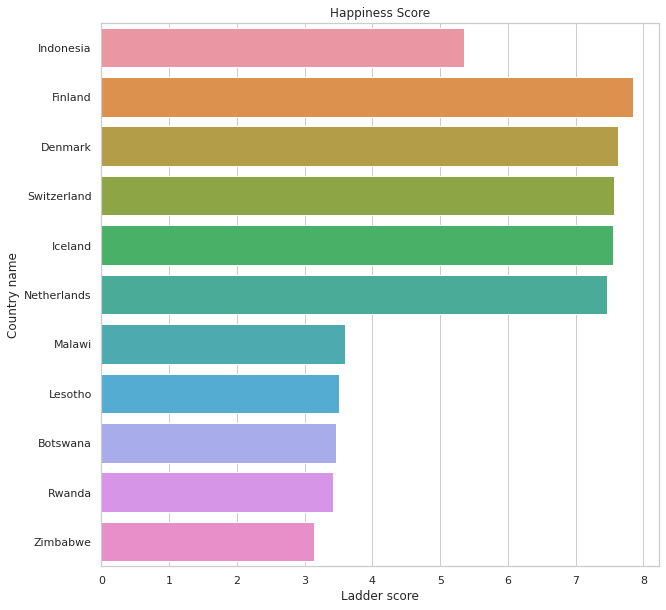

In [392]:
plt.figure(figsize=(10,10))
sns.barplot(x = "Ladder score", y = "Country name", data= df21[df21["Country name"] == "Indonesia"].append(df21.iloc[0:5].append(df21.iloc[-6:-1])))
plt.title("Happiness Score")

# Happiness Score in Southeast Asia

Text(0.5, 1.0, 'Happiness Score in Southeast Asia')

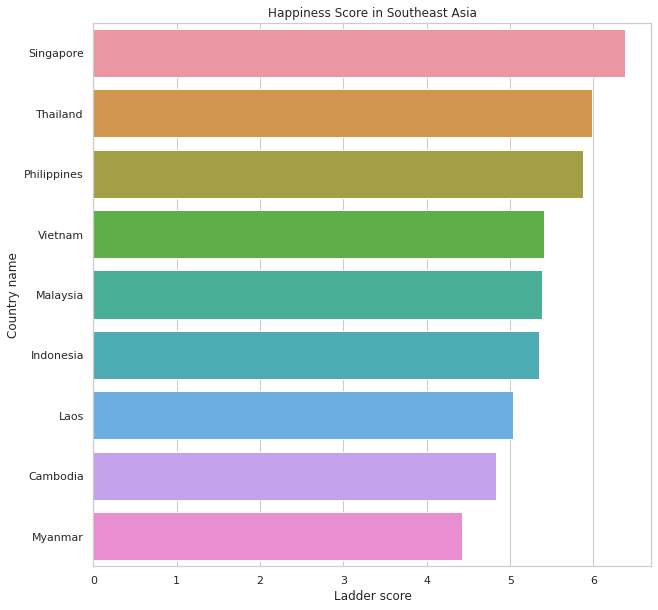

In [393]:
sea = df21[df21["Regional indicator"] == "Southeast Asia"]
fig, axes = plt.subplots(figsize=(10,10))
sns.barplot(ax=axes, x="Ladder score", y="Country name", data = sea)
plt.title("Happiness Score in Southeast Asia")

# Happiness Growth

In [394]:
pivot = pd.pivot_table(df, index="Country name", columns = 'year', values = "Life Ladder")

temp = df21[["Country name", "Ladder score"]].set_index("Country name")
temp = temp["Ladder score"].rename(2021)

pivot = pivot.join(temp)
pivot

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country name,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,3.724,4.402,4.758,3.832,3.783,3.572,3.131,3.983,4.220,2.662,2.694,2.375,NaN,2.523
Albania,NaN,NaN,4.634,NaN,5.485,5.269,5.867,5.510,4.551,4.814,4.607,4.511,4.640,5.004,4.995,5.365,5.117
Algeria,NaN,NaN,NaN,NaN,NaN,5.464,5.317,5.605,NaN,6.355,NaN,5.341,5.249,5.043,4.745,NaN,4.887
Angola,NaN,NaN,NaN,NaN,NaN,NaN,5.589,4.360,3.937,3.795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,6.313,6.073,5.961,6.424,6.441,6.776,6.468,6.582,6.671,6.697,6.427,6.039,5.793,6.086,5.901,5.929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,7.17,6.525,NaN,6.258,7.189,7.478,6.580,7.067,6.553,6.136,5.569,4.041,5.071,5.006,5.081,4.574,4.892
Vietnam,NaN,5.294,5.422,5.480,5.304,5.296,5.767,5.535,5.023,5.085,5.076,5.062,5.175,5.296,5.467,NaN,5.411
Yemen,NaN,NaN,4.477,NaN,4.809,4.350,3.746,4.061,4.218,3.968,2.983,3.826,3.254,3.058,4.197,NaN,3.658


Text(0.5, 1.0, 'Happiness Score Each Year')

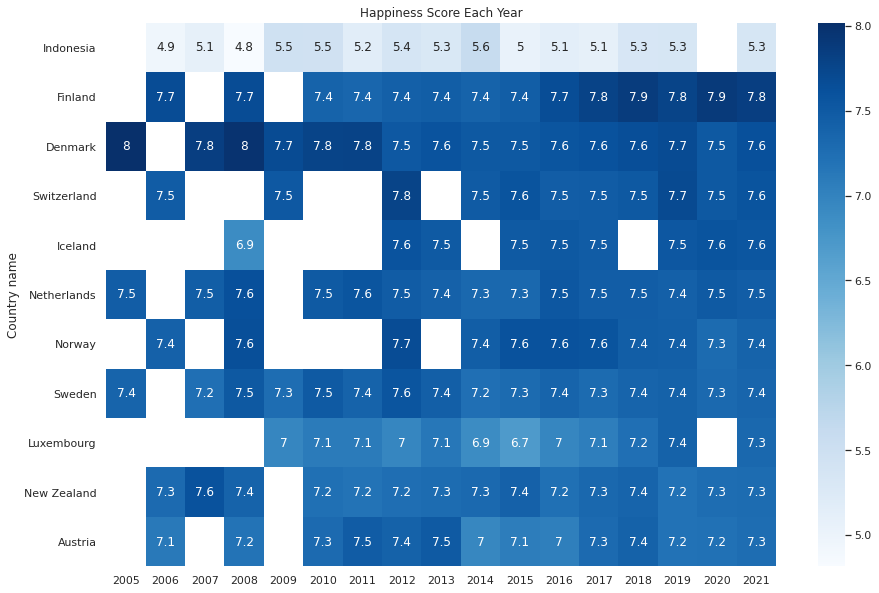

In [408]:
pt_temp = pivot.sort_values(2021,ascending = False)
pt_temp = pt_temp[pt_temp.index == "Indonesia"].append(pt_temp.iloc[0:10])

plt.figure(figsize=(15,10))
sns.heatmap(pt_temp, annot=True, cmap="Blues")
plt.title("Happiness Score Each Year")

In [396]:
pt = pivot.transpose()
pt

Country name,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
2005,NaN,NaN,NaN,NaN,NaN,NaN,7.341,NaN,NaN,NaN,...,NaN,6.984,NaN,NaN,NaN,7.170,NaN,NaN,NaN,NaN
2006,NaN,NaN,NaN,NaN,6.313,4.289,NaN,7.122,4.728,NaN,...,6.734,NaN,7.182,5.786,5.232,6.525,5.294,NaN,4.824,3.826
2007,NaN,4.634,NaN,NaN,6.073,4.882,7.285,NaN,4.568,NaN,...,NaN,6.802,7.513,5.694,NaN,NaN,5.422,4.477,3.998,3.280
2008,3.724,NaN,NaN,NaN,5.961,4.652,7.254,7.181,4.817,NaN,...,NaN,6.986,7.280,5.664,5.311,6.258,5.480,NaN,4.730,3.174
2009,4.402,5.485,NaN,NaN,6.424,4.178,NaN,NaN,4.574,5.701,...,6.866,6.907,7.158,6.296,5.261,7.189,5.304,4.809,5.260,4.056
2010,4.758,5.269,5.464,NaN,6.441,4.368,7.450,7.303,4.219,5.937,...,7.097,7.029,7.164,6.062,5.095,7.478,5.296,4.350,NaN,4.682
2011,3.832,5.867,5.317,5.589,6.776,4.260,7.406,7.471,4.680,4.824,...,7.119,6.869,7.115,6.554,5.739,6.580,5.767,3.746,4.999,4.846
2012,3.783,5.510,5.605,4.360,6.468,4.320,7.196,7.401,4.911,5.027,...,7.218,6.881,7.026,6.450,6.019,7.067,5.535,4.061,5.013,4.955
2013,3.572,4.551,NaN,3.937,6.582,4.277,7.364,7.499,5.481,6.690,...,6.621,6.918,7.249,6.444,5.940,6.553,5.023,4.218,5.244,4.690
2014,3.131,4.814,6.355,3.795,6.671,4.453,7.289,6.950,5.252,6.165,...,6.540,6.758,7.151,6.561,6.049,6.136,5.085,3.968,4.346,4.184


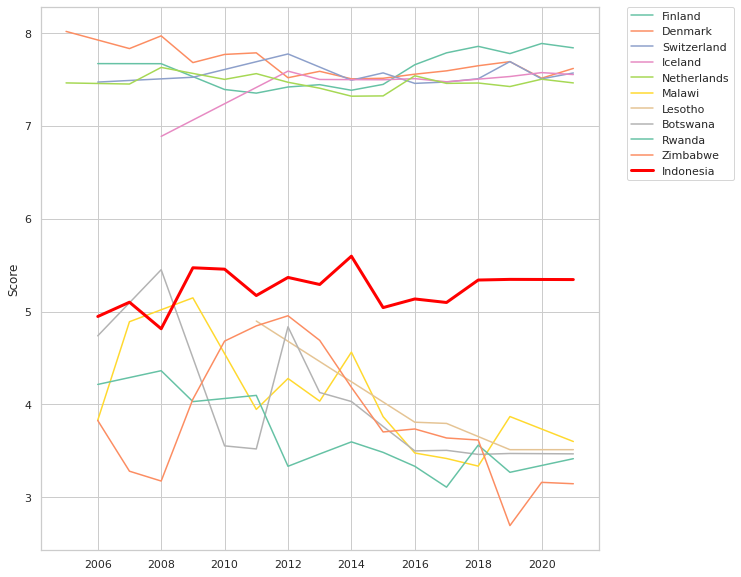

In [397]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(figsize=(10,10))
# plt.figure(figsize=(10,10))
axes.set_ylabel("Score")
for country in countries[0:5]:
    sns.lineplot(ax = axes, x = pt[country].index, y = country, data=pt, label=country)
    
for country in countries[-6:-1]:
    sns.lineplot(ax = axes, x = pt[country].index, y = country, data=pt, label=country)

sns.lineplot(ax = axes, x = pt["Indonesia"].index, y = "Indonesia", data=pt, label="Indonesia", linewidth = 3, color="red")
# for country in countries[-6:-1]:
#     sns.lineplot(ax = axes, x = "year", y = "Life Ladder", data=df[df["Country name"] == country], label=country)
# sns.lineplot(ax = axes, x = "year", y = "Life Ladder", data=df[df["Country name"] == "Indonesia"], label="Indonesia", linewidth = 3, color="red")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 1.0, "Happiness Growth from 2000's until 2021")

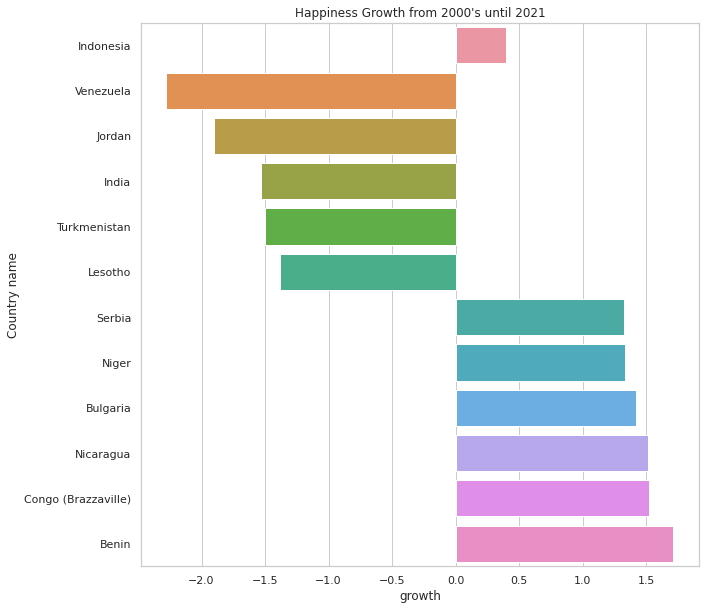

In [398]:
dftemp = pd.DataFrame()
dftemp["Country name"] = countries
min_values = np.array([])
for name in countries:
    min_values = np.append(min_values, df[df["Country name"] == name].iloc[0]["Life Ladder"])
dftemp["min_val"] = min_values
dftemp["val_2021"] = df21["Ladder score"]
dftemp["growth"] = dftemp["val_2021"] - dftemp["min_val"]
dftemp = dftemp.sort_values("growth")
fig,ax = plt.subplots(figsize=(10,10))
sns.barplot(ax = ax, x = "growth", y="Country name", data = dftemp[dftemp["Country name"] == "Indonesia"].append(dftemp.iloc[0:5].append(dftemp.iloc[-6:])))
plt.title("Happiness Growth from 2000's until 2021")


# Generosity

Text(0.5, 1.0, 'Generosity')

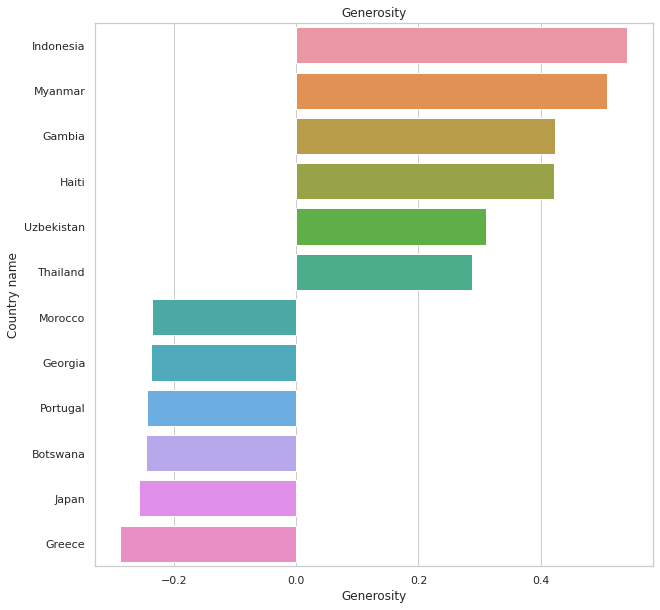

In [399]:
generosity = df21.sort_values("Generosity",ascending = False)
plt.figure(figsize=(10,10))
sns.barplot(x="Generosity", y="Country name", data = generosity.iloc[0:6].append(generosity.iloc[-6:]))
plt.title("Generosity")

Indonesia is the most generous country!!

# GDP

Text(0.5, 1.0, 'GDP')

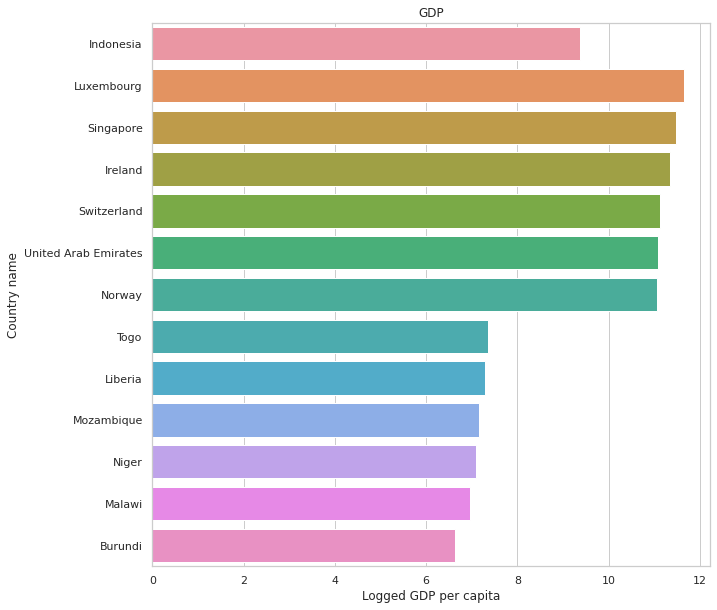

In [400]:
gdp = df21.sort_values("Logged GDP per capita",ascending = False)
fig, axes = plt.subplots(figsize=(10,10))
sns.barplot(ax=axes, x="Logged GDP per capita", y="Country name", data = gdp[gdp["Country name"] == "Indonesia"].append(gdp.iloc[0:6].append(gdp.iloc[-6:])))
plt.title("GDP")

# Freedom to make Life Choices

Text(0.5, 1.0, 'Freedom to make life choices')

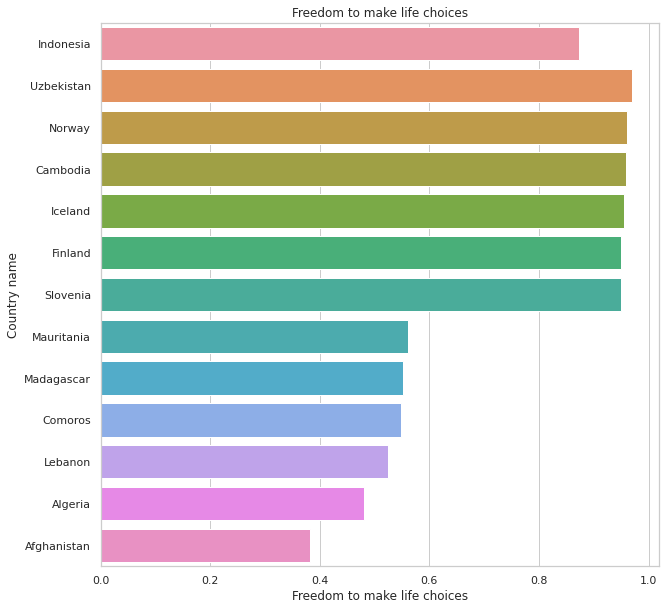

In [401]:
freedom = df21.sort_values("Freedom to make life choices",ascending = False)
fig, axes = plt.subplots(figsize=(10,10))
sns.barplot(ax=axes, x="Freedom to make life choices", y="Country name", data = freedom[freedom["Country name"] == "Indonesia"].append(freedom.iloc[0:6].append(freedom.iloc[-6:])))
plt.title("Freedom to make life choices")

# Social Support

Text(0.5, 1.0, 'Social support')

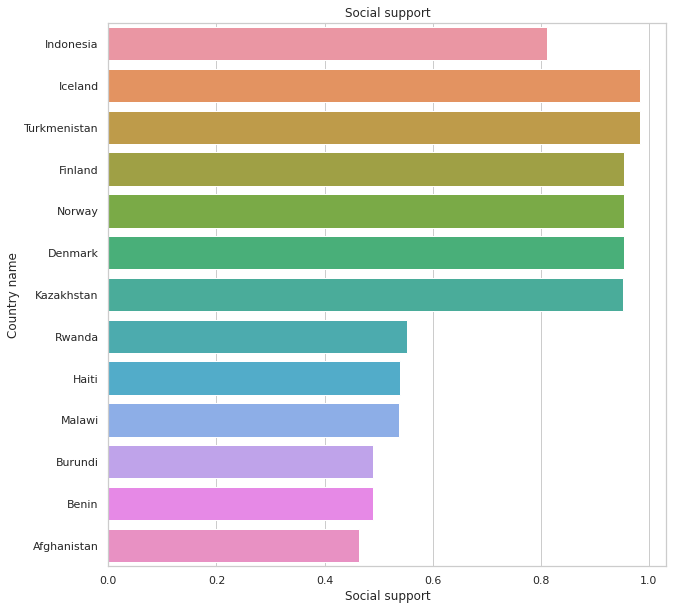

In [402]:
social = df21.sort_values("Social support",ascending = False)
fig, axes = plt.subplots(figsize=(10,10))
sns.barplot(ax=axes, x="Social support", y="Country name", data = social[social["Country name"] == "Indonesia"].append(social.iloc[0:6].append(social.iloc[-6:])))
plt.title("Social support")

# Life Expectancy

Text(0.5, 1.0, 'Healthy life expectancy')

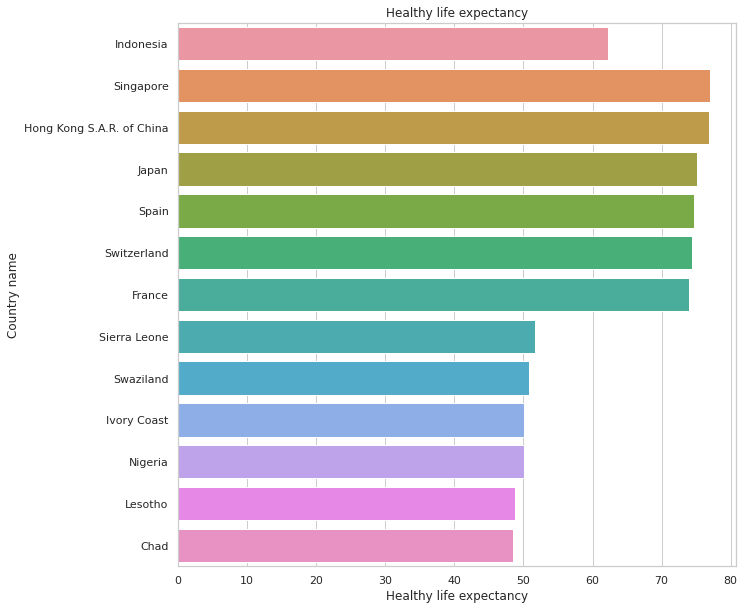

In [403]:
life = df21.sort_values("Healthy life expectancy",ascending = False)
fig, axes = plt.subplots(figsize=(10,10))
sns.barplot(ax=axes, x="Healthy life expectancy", y="Country name", data = life[life["Country name"] == "Indonesia"].append(life.iloc[0:6].append(life.iloc[-6:])))
plt.title("Healthy life expectancy")

# Corruption

Text(0.5, 1.0, 'Perceptions of corruption')

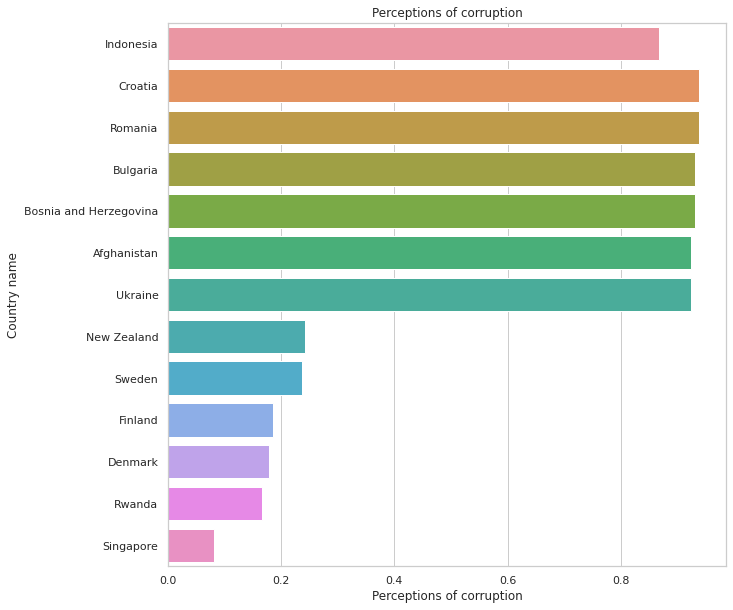

In [404]:
corruption = df21.sort_values("Perceptions of corruption",ascending = False)
fig, axes = plt.subplots(figsize=(10,10))
sns.barplot(ax=axes, x="Perceptions of corruption", y="Country name", data = corruption[corruption["Country name"] == "Indonesia"].append(corruption.iloc[0:6].append(corruption.iloc[-6:])))
plt.title("Perceptions of corruption")

# Happiness Factor Scatterplot

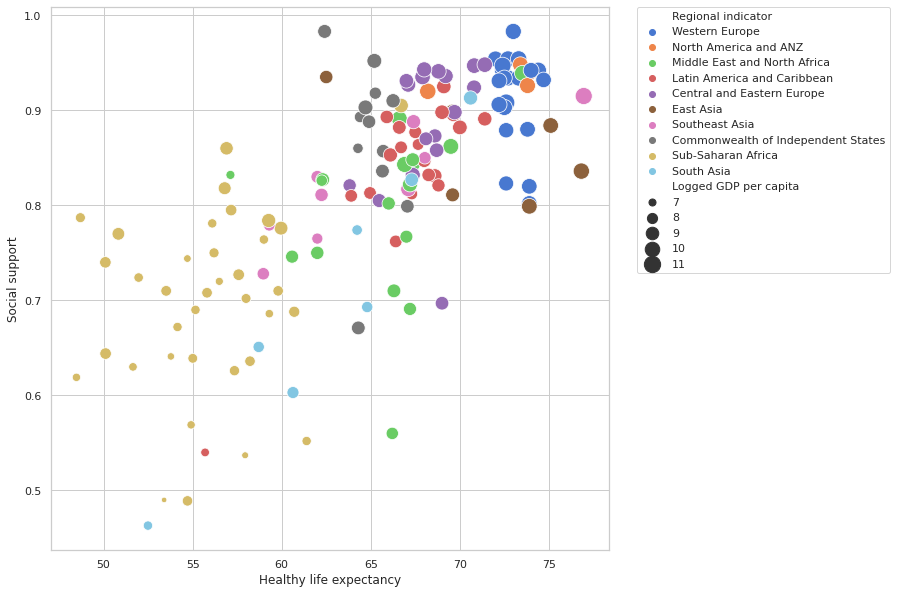

In [405]:
plt.figure(figsize=(10,10))

sns.scatterplot(x = "Healthy life expectancy", y = "Social support", hue = "Regional indicator", size = "Logged GDP per capita",sizes=(30, 300),palette="muted", data=df21)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Happiness Factor Comparison

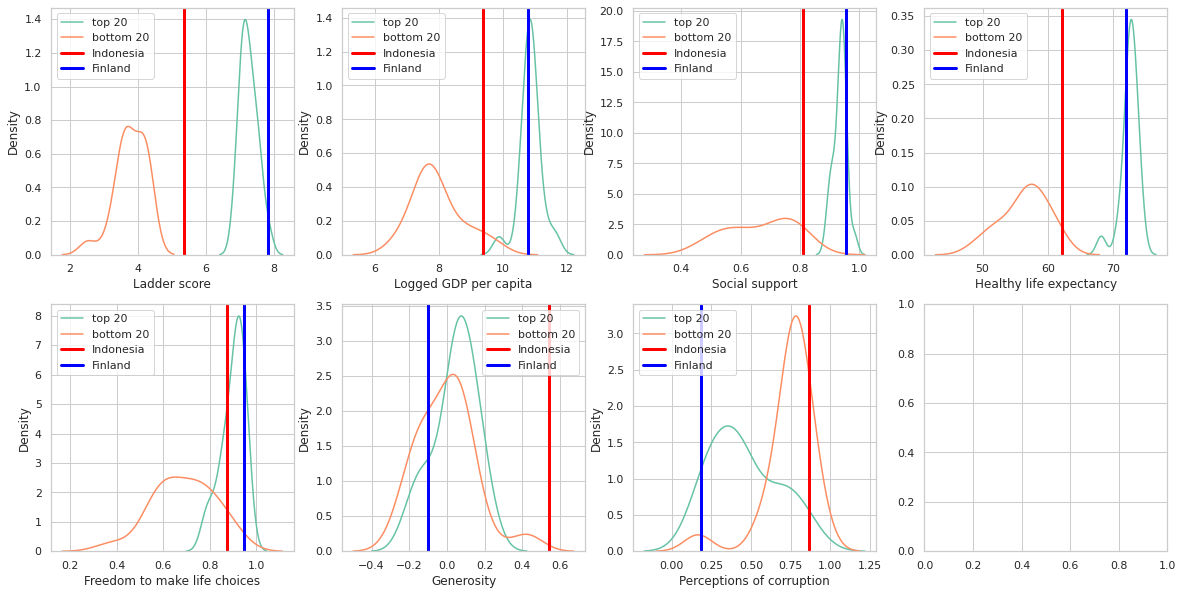

In [406]:
top20 = df21[["Ladder score", "Logged GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]].iloc[0:20]
bot20 = df21[["Ladder score", "Logged GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]].iloc[-20:]
ina = df21[df21["Country name"] == "Indonesia"][["Ladder score", "Logged GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]]
fin = df21[df21["Country name"] == "Finland"][["Ladder score", "Logged GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]]

fig, axes = plt.subplots(2,4, figsize=(20,10))
a = 0
b = 0
for col in top20.columns:
    sns.kdeplot(x = top20[col], ax=axes[a][b], label = "top 20")
    sns.kdeplot(x = bot20[col], ax=axes[a][b], label = "bottom 20")
    axes[a][b].axvline(ina[col].values[0], c='r', label="Indonesia", linewidth=3)
    axes[a][b].axvline(fin[col].values[0], c='b', label="Finland", linewidth=3)
    axes[a][b].legend()
    b+=1
    if(b > 3):
        a+=1
        b = 0

That's it!
I hope you can give me some suggestions to improve my notebook since this is my first visualization notebook